# Data Project - Stock Market Analysis 

THe objective of this data project is to perform share market data analysis to find answers for below questions using Chubb and its competitor's data for 2018 

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks' closing prices?
    4.) What was the correlation between different stocks' daily returns?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior?

In [1]:
#Importing necessary libraries
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader import DataReader

# For time stamps
from datetime import datetime


Using Yahoo and pandas to grab some data for some insurance stocks.

In [2]:
# The insurance stocks we'll use for this analysis
insur_list = ['CB','TRV','ALL','PGR']

# Set up End and Start times for data grab
start = datetime(2018,1,1)
end = datetime(2018,12,31)


#For loop for grabing yahoo finance data and setting as a dataframe

for stock in insur_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [3]:
# Summary Stats for Chubb
CB.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,136.647690,134.277769,135.498844,135.464621,1.712669e+06,133.642190
std,6.932736,6.930108,6.995159,6.926783,6.162947e+05,6.219492
min,124.260002,119.540001,120.580002,120.190002,5.076000e+05,120.190002
25%,132.375000,129.739998,131.445000,131.415001,1.285150e+06,130.113037
50%,135.570007,133.539993,134.470001,134.570007,1.556100e+06,132.969147
75%,139.690002,137.560005,138.825005,138.644997,1.984450e+06,136.880455
max,157.500000,154.580002,155.839996,156.149994,4.130300e+06,152.753845


In [4]:
# General Info about the columns
CB.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-01-02 to 2018-12-31
Data columns (total 6 columns):
High         251 non-null float64
Low          251 non-null float64
Open         251 non-null float64
Close        251 non-null float64
Volume       251 non-null float64
Adj Close    251 non-null float64
dtypes: float64(6)
memory usage: 13.7 KB


plotting out the volume and closing price of the stocks


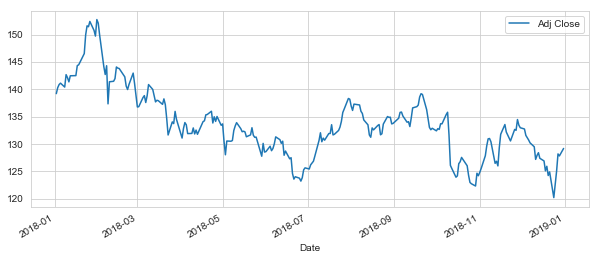

In [5]:
# Let's see a historical view of the closing price
CB['Adj Close'].plot(legend=True,figsize=(10,4))

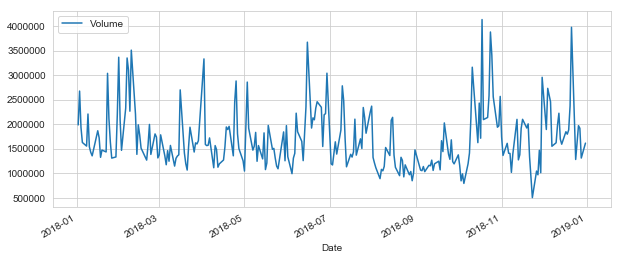

In [6]:
# Plotting the total volume of stock being traded each day over the past year
CB['Volume'].plot(legend=True,figsize=(10,4))

Calculating moving average 

In [7]:
# Using pandas's built-in rolling mean calculator to calculate moving average 

ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    CB[column_name]=  CB['Adj Close'].rolling(ma).mean()

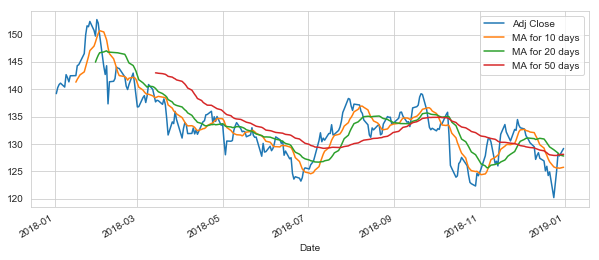

In [8]:
CB[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

Analyzing the Daily returns of the Stock

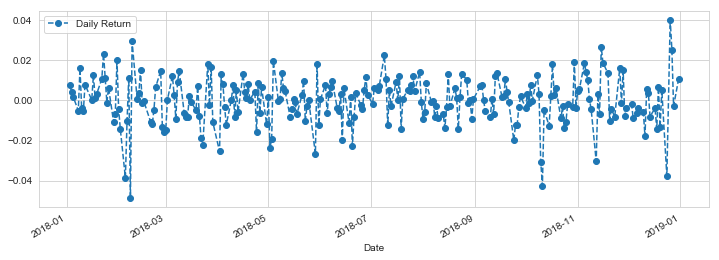

In [9]:
# We'll use pct_change to find the percent change for each day
CB['Daily Return'] = CB['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
CB['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


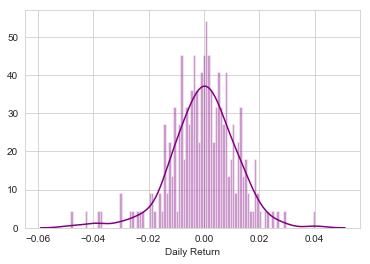

In [10]:
# Using Seaborn
sns.distplot((CB['Daily Return'].dropna()),bins=100,color='purple')


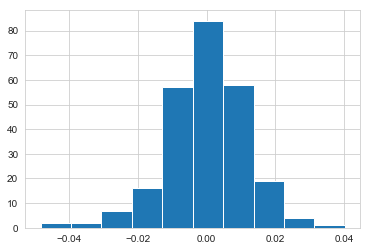

In [11]:
#Verifying the above chart with pandas built-in hitogram chart
CB['Daily Return'].hist()

Analyzing the retuns of all top insurers stock 

In [12]:
# Grab all the closing prices for the insur stock list into one DataFrame
closing_df = DataReader(['CB','TRV','ALL','PGR'],'yahoo',start,end)['Adj Close']

In [13]:
closing_df.head()

Symbols,ALL,CB,PGR,TRV
Date,,,,
2018-01-02,99.935928,139.205078,54.209106,128.955948
2018-01-03,99.994774,140.300720,54.179733,129.366348
2018-01-04,98.837730,140.868118,54.169937,129.366348
2018-01-05,99.886909,141.122452,54.375572,129.131836
2018-01-08,99.416237,140.408325,54.542038,128.438110


In [14]:
#Claculating the percentage change of all the stock prices
insur_rets = closing_df.pct_change()

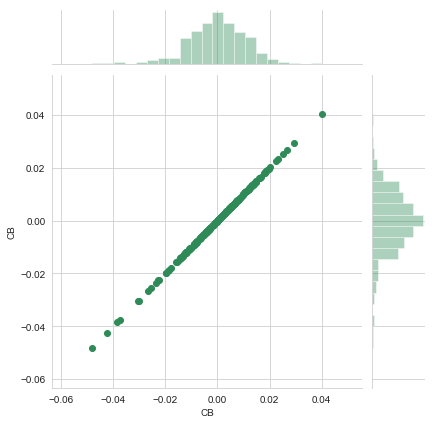

In [15]:
# Comparing Chubb to itself should show a perfectly linear relationship
sns.jointplot('CB','CB',(insur_rets),kind='scatter',color='seagreen')

Checking if the stocks are correleated with other insure stock

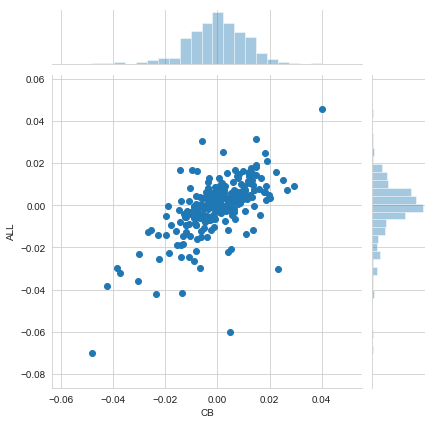

In [16]:
# Chubb & All state
sns.jointplot('CB','ALL',insur_rets,kind='scatter')

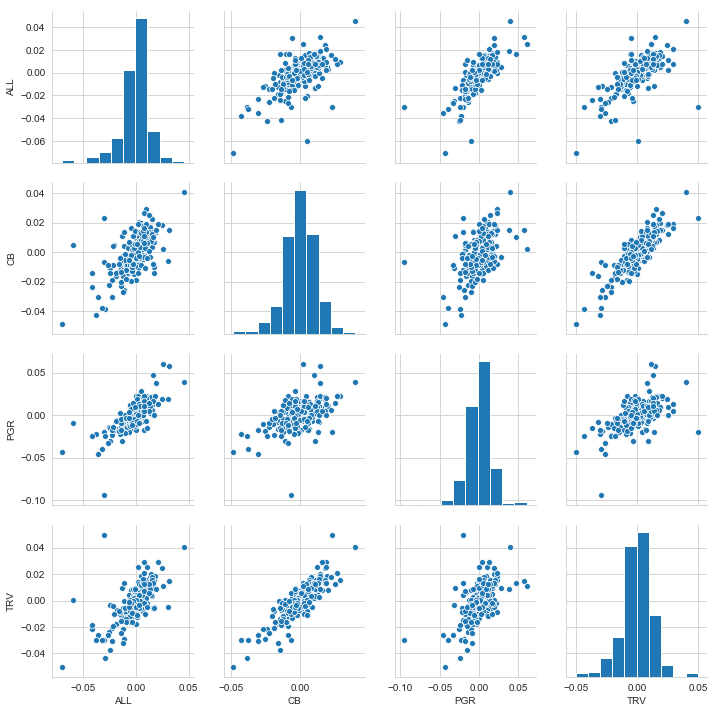

In [17]:
sns.pairplot(insur_rets.dropna())

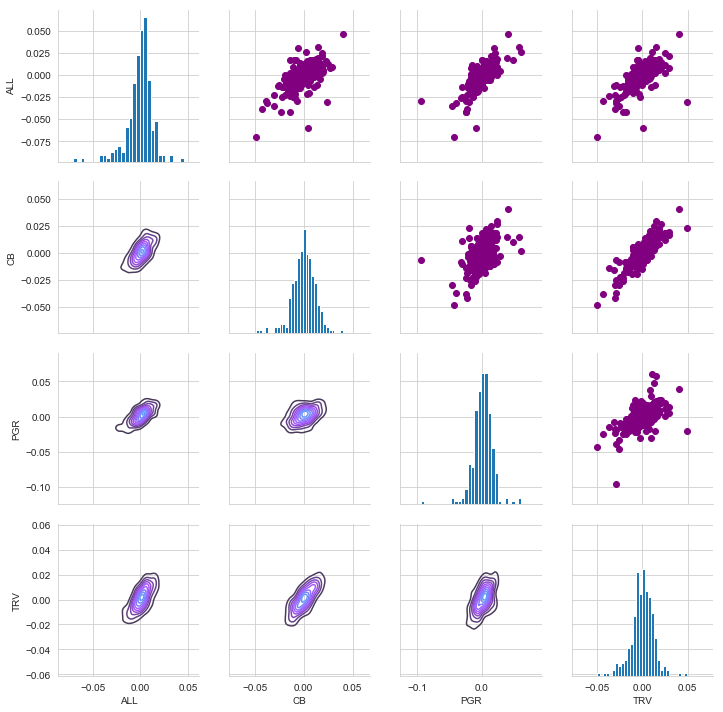

In [18]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(insur_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Analyzing the correlation of closing prices of top competitors 

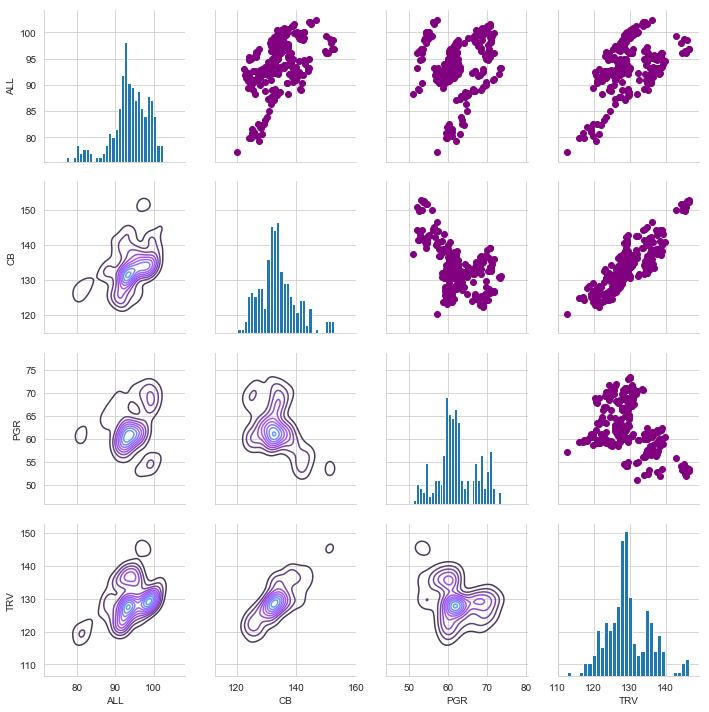

In [19]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)

Finding the correlation value between stocks

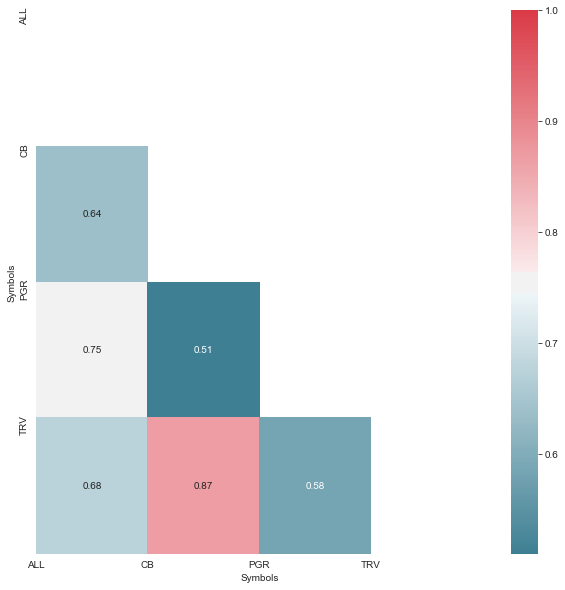

In [20]:
def halfHeatMap(df, mirror):

    # Create Correlation df
    corr = df.corr()
    # Plot figsize
    fig, ax = plt.subplots(figsize=(10, 10))
    # Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)

    if mirror == True:
        #Generate Heat Map, allow annotations and place floats in map
        sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
        #Apply xticks
        plt.xticks(range(len(corr.columns)), corr.columns);
        #Apply yticks
        plt.yticks(range(len(corr.columns)), corr.columns)
        #show plot

    else:
        # Drop self-correlations
        dropSelf = np.zeros_like(corr)
        dropSelf[np.triu_indices_from(dropSelf)] = True# Generate Color Map
        colormap = sns.diverging_palette(220, 10, as_cmap=True)
        # Generate Heat Map, allow annotations and place floats in map
        sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf)
        # Apply xticks
        plt.xticks(range(len(corr.columns)), corr.columns);
        # Apply yticks
        plt.yticks(range(len(corr.columns)), corr.columns)
        #show plot
        plt.show()

        plt.show()
    
halfHeatMap(insur_rets.dropna(), False)

<b> Risk Analysis </b>

Comparing expected return with std of daily return to quantify the risk of stock


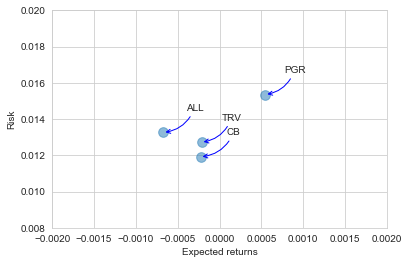

In [21]:
rets = insur_rets.dropna()

#size of the plotted return
area = np.pi*30

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

#x and y limits
plt.ylim([0.008,0.020])
plt.xlim([-0.002,0.002])

#axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (40, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '->', connectionstyle="arc3,rad=-0.3", color='b'))

<b>Calculating Value at Risk Parameter</b>

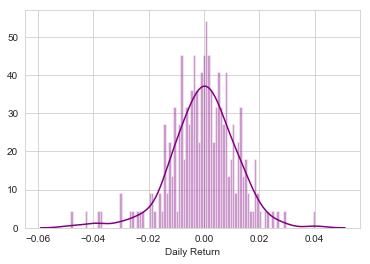

In [22]:
sns.distplot((CB['Daily Return'].dropna()),bins=100,color='purple')

In [23]:
# The 0.05 empirical quantile of daily returns
rets['CB'].quantile(0.05)

-0.019435674810880446

The 0.05 empirical quantile of daily returns is at -0.019. That means that with 95% confidence, our worst daily loss for CB will not exceed 1.9%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.019 * 1,000,000 = $19,000.

<b> Calculating Value at Risk using the Monte Carlo method </b>

Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

In [24]:
# Set up time horizon for market simulation
days = 365

#delta
dt = 1/days

# mean
mu = rets.mean()['CB']

# std dev
sigma = rets.std()['CB']

In [25]:
''' Creating a function that takes in the starting price and number of days, 
and uses the sigma and mu we already calculated from out daily returns
'''
def stock_monte_carlo(start_price,days,mu,sigma):

    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [26]:
CB.head()


,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2018-01-02,147.070007,141.399994,146.419998,142.300003,1986500.0,139.205078,NaN,NaN,NaN,NaN
2018-01-03,144.139999,141.759995,141.910004,143.419998,2675400.0,140.300720,NaN,NaN,NaN,0.007871
2018-01-04,145.330002,143.339996,143.610001,144.000000,1935500.0,140.868118,NaN,NaN,NaN,0.004044
2018-01-05,144.960007,142.779999,144.360001,144.259995,1629100.0,141.122452,NaN,NaN,NaN,0.001805
2018-01-08,143.740005,142.009995,143.559998,143.529999,1556100.0,140.408325,NaN,NaN,NaN,-0.005060


Text(0.5, 1.0, 'Monte Carlo Analysis for Chubb')

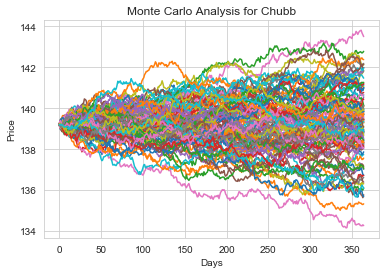

In [27]:
#Adjusted closing price of 02-01-2018
start_price = 139.20

#100 simulations
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Chubb')

In [28]:
#running the simulation for larger number to get the closing points on all simulation
#
runs = 10000

simulations = np.zeros(runs)

np.set_printoptions(threshold=5)

for run in range(runs):    
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

Plotting an histogram with simulation results as 1% emprical quantile

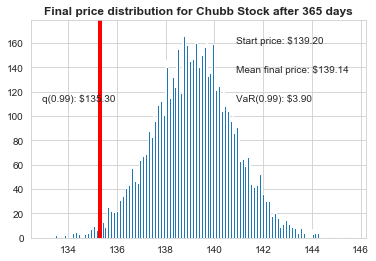

In [29]:
q = np.percentile(simulations, 1)
plt.hist(simulations,bins=200)
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)
plt.axvline(x=q, linewidth=4, color='r')
plt.title(u"Final price distribution for Chubb Stock after %s days" % days, weight='bold');


The Estimated Value at Risk for Chubb at 1% emprical quantile is looks to be USD 3.91 which is basically 
means for every stock that is being purchased, $3.91 is at risk 99% of the time.  this is found using Monte Carlo Simulation.